In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [200]:
df = pd.read_pickle("acc_HR_ssh.pkl")

# Extracting information

In [202]:
df["mean"] = ""
df["std"] = ""
df["kurtosis"] = ""
df["skewness"] = ""
df["max"] = ""
df["min"] = ""
df["crest factor"] = ""
df["rms"] = ""
df["shape factor"] = ""
df["pump label"] = ""

In [203]:
for i, row in df.iterrows():
    means = []
    for ts in row["ts"]:
        means.append(np.nanmean(ts))
    df["mean"][i] = means

In [204]:
for i, row in df.iterrows():
    std = []
    for ts in row["ts"]:
        std.append(np.nanstd(ts))
    df["std"][i] = std

In [205]:
for i, row in df.iterrows():
    kurtosis = []
    for ts in row["ts"]:
        kurtosis.append(sc.stats.kurtosis(ts, nan_policy="omit"))
    df["kurtosis"][i] = kurtosis

In [206]:
for i, row in df.iterrows():
    skewness = []
    for ts in row["ts"]:
        skewness.append(sc.stats.skew(ts, nan_policy="omit"))
    df["skewness"][i] = skewness

In [207]:
for i, row in df.iterrows():
    max = []
    for ts in row["ts"]:
        max.append(np.nanmax(ts))
    df["max"][i] = max

In [208]:
for i, row in df.iterrows():
    min = []
    for ts in row["ts"]:
        min.append(np.nanmin(ts))
    df["min"][i] = min

In [209]:
for i, row in df.iterrows():
    rms = []
    for ts in row["ts"]:
        rms.append(np.sqrt(np.nanmean(ts**2)))
    df["rms"][i] = rms

In [210]:
for i, row in df.iterrows():
    cf = []
    for ts in row["ts"]:
        cf.append(np.nanmax(ts) / (np.sqrt(np.nanmean(ts**2))))
    df["crest factor"][i] = cf

In [211]:
for i, row in df.iterrows():
    shf = []
    for ts in row["ts"]:
        shf.append(np.sqrt(np.nanmean(ts**2)) / np.nanmean(abs(ts)))
    df["shape factor"][i] = shf

In [212]:
# 1 --> has pump problem
# 0 --> doesn't have pump problem

for i, row in df.iterrows():
    if "Pump_Flow_Problem." in row["faults"]:
        df.loc[i, "pump label"] = "1"
    else:
        df.loc[i, "pump label"] = "0"

In [213]:
df.head()

,ts,status,faults,machine_name,report_date,portal_date,mean,std,kurtosis,skewness,max,min,crest factor,rms,shape factor,pump label
0,"[[0.698928444, -0.506124287, -0.028853162, 0.3...",l3,"[Machine_Bearings_Lubrication_Problem., Machin...",mainfana,2021-01-21 00:00:00,2021-01-21 00:00:00,"[-5.5247938583639013e-05, -1.4844203638583522e...","[0.42338053138935366, 0.2883417070847872, 0.21...","[-0.6836664996037509, 0.0809598823296338, -0.1...","[0.0369235998435768, -0.019098899629931575, -0...","[1.237621822, 1.100985244, 0.656183891, 2.0379...","[-1.185769862, -1.123482009, -0.733821692, -2....","[2.9231901792965758, 3.8183350361356876, 3.084...","[0.42338053499407147, 0.28834170746688653, 0.2...","[1.200198929812367, 1.2543909766979386, 1.2497...",0
1,"[[-0.552567831, 0.791081268, 0.252465092, -0.6...",l3,"[Machine_Bearings_Lubrication_Problem., Machin...",mainfana,2021-06-16 00:00:00,2021-06-16 00:00:00,"[-3.866748863247928e-05, 9.495890844932897e-05...","[0.49927098681774634, 0.28482178658545587, 0.1...","[-0.9072378567424231, -0.14520098735034592, -0...","[0.038023023966509806, -0.12115576513622346, -...","[1.277422037, 0.961079871, 0.478181753, 4.7098...","[-1.312764919, -1.102373739, -0.588164551, -2....","[2.558574535466063, 3.374319882997163, 2.91864...","[0.49927098831510425, 0.28482180241499294, 0.1...","[1.1761160967795556, 1.2425966205728132, 1.241...",0
2,"[[-0.291980794, -0.759598587, 0.013602628, 0.7...",l3,"[Machine_Misalignment., Structural_Looseness.,...",mainfana,2020-10-14 00:00:00,2020-10-14 00:00:00,"[-0.00011569433003662677, -9.698854069601204e-...","[0.8771231969017833, 0.5164405579538317, 0.498...","[-0.3346618249080735, -0.3072253646470111, -0....","[0.28831165060045216, -0.2788802963547298, -0....","[2.905158347, 1.49199512, 1.453887597, 7.73022...","[-2.826706469, -1.656773151, -1.485662608, -6....","[3.31214398614648, 2.888996800809494, 2.915384...","[0.8771232045319418, 0.5164405580449049, 0.498...","[1.2304313317648763, 1.2315127468524538, 1.218...",0
3,"[[0.376561978, -0.212110108, 0.26475303, 0.918...",l3,"[Machine_Bearings_Lubrication_Problem., Machin...",mainfana,2021-05-27 00:00:00,2021-05-27 00:00:00,"[-1.4565605926737413e-05, -4.519292691086498e-...","[0.7950953065748968, 0.3003849115558326, 0.176...","[-0.2811532613027583, 0.10012464711429914, 0.0...","[0.029107691965882865, 0.3880407968307634, -0....","[3.663812522, 1.232993775, 0.520759012, 4.6999...","[-2.866883579, -0.980662188, -0.79051409, -4.5...","[4.60801678878995, 4.104712698980825, 2.950225...","[0.7950953067083129, 0.3003849149554717, 0.176...","[1.228483229482808, 1.266831690215848, 1.24286...",0
4,"[[0.769191343, -0.70274564, 0.230745098, 0.356...",hmv,"[Machine_Misalignment., Machine_Bearings_Loosn...",mainfana,2022-01-20 00:00:00,2022-01-20 00:00:00,"[-9.323362112332253e-05, 0.0002354506529914499...","[0.6249363815347525, 0.6398038406710516, 0.234...","[-0.40981612299295067, -0.20028196902840145, -...","[-0.02478559961816128, 0.006539361515471054, 0...","[1.88134193, 2.123217372, 0.801750988, 2.63123...","[-2.045216963, -2.004436654, -0.745348378, -2....","[3.010453487189936, 3.318544049379788, 3.42093...","[0.6249363884894669, 0.6398038839944927, 0.234...","[1.2268892176518016, 1.2474301872293234, 1.239...",0


# Adjusting the data to be trained on

In [214]:
training_cols = [
    "mean",
    "std",
    "kurtosis",
    "skewness",
    "max",
    "min",
    "crest factor",
    "rms",
    "shape factor",
]

In [215]:
all_data = np.stack(
    [np.array(df[col].apply(lambda x: x[-6:])).tolist() for col in training_cols],
    axis=1,
)

In [216]:
all_data = torch.tensor(all_data, dtype=float)

In [217]:
y = torch.tensor(df["pump label"].values.astype(float)).view(-1, 1)

In [218]:
reshaped_data = all_data.view(213, -1)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(
    reshaped_data, y, test_size=0.2, random_state=42
)

# Building the model

In [285]:
class ANN_model(nn.Module):
    def __init__(self, input_size=54, output_size=1, layers=[25, 10]):
        super().__init__()
        self.fc1 = nn.Linear(input_size, layers[0])
        self.dropout = nn.Dropout()
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc3 = nn.Linear(layers[1], output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = torch.sigmoid(self.fc3(x))

        return x

* Defining optimizer and loss function

In [286]:
torch.manual_seed(42)
model = ANN_model()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.BCELoss()

# Training

In [287]:
losses = []
epochs = 25

for i in range(epochs):
    y_train_predicted = model(X_train.float())
    loss = criterion(y_train_predicted, y_train.float())
    losses.append(loss)

    y_train_predicted_binary = (y_train_predicted > 0.5).float()
    accuracy = accuracy_score(y_train, y_train_predicted_binary)

    print(f"epoch: {i:2} loss: {loss.item():10.8f}   accuracy: {accuracy * 100:.2f}%")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch:  0 loss: 0.74731344   accuracy: 56.47%
epoch:  1 loss: 0.63455462   accuracy: 72.94%
epoch:  2 loss: 0.62284106   accuracy: 71.76%
epoch:  3 loss: 0.65383595   accuracy: 73.53%
epoch:  4 loss: 0.61911738   accuracy: 72.94%
epoch:  5 loss: 0.58834338   accuracy: 73.53%
epoch:  6 loss: 0.61028963   accuracy: 73.53%
epoch:  7 loss: 0.63553315   accuracy: 73.53%
epoch:  8 loss: 0.58313781   accuracy: 73.53%
epoch:  9 loss: 0.59112251   accuracy: 73.53%
epoch: 10 loss: 0.58489043   accuracy: 73.53%
epoch: 11 loss: 0.58234102   accuracy: 73.53%
epoch: 12 loss: 0.60033947   accuracy: 73.53%
epoch: 13 loss: 0.57165492   accuracy: 73.53%
epoch: 14 loss: 0.56941116   accuracy: 73.53%
epoch: 15 loss: 0.58978224   accuracy: 73.53%
epoch: 16 loss: 0.54628092   accuracy: 73.53%
epoch: 17 loss: 0.56667662   accuracy: 73.53%
epoch: 18 loss: 0.55646825   accuracy: 73.53%
epoch: 19 loss: 0.55063546   accuracy: 73.53%
epoch: 20 loss: 0.54417396   accuracy: 73.53%
epoch: 21 loss: 0.56295729   accur

# Validating

In [288]:
with torch.no_grad():
    y_test_predicted = model(X_test.float())
    loss = criterion(y_test_predicted, y_test.float())

    y_test_predicted_binary = (y_test_predicted > 0.5).float()
    accuracy = accuracy_score(y_test, y_test_predicted_binary)

    print(f"loss: {loss.item():10.8f}   accuracy: {accuracy * 100:.2f}%")

loss: 0.66084057   accuracy: 69.77%


In [ ]:
* ploting loss After each epoch

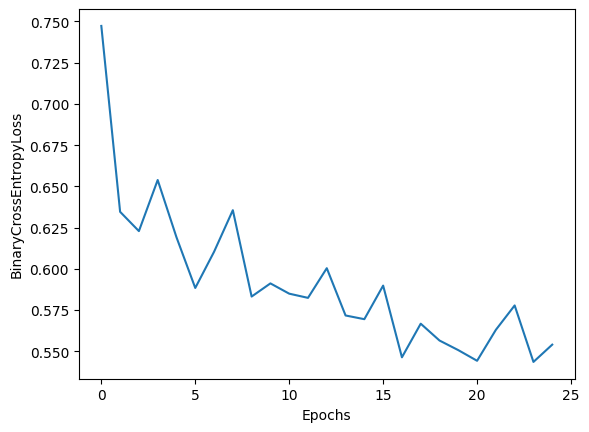

In [292]:
with torch.no_grad():
    plt.plot(losses)
    plt.xlabel("Epochs")
    plt.ylabel("BinaryCrossEntropyLoss")